In [1]:
!pip uninstall -y qiskit qiskit-machine-learning

!pip install qiskit==0.43.0 qiskit-machine-learning==0.6.1


  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.4/133.4 kB 4.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 148.7/148.7 kB 11.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 95.2 MB/s eta 0:00:00:00:010:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 241.5/241.5 kB 19.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.9/5.9 MB 99.7 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 82.4 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 81.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.6/38.6 MB 48.7 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 109.0/109.0 kB 5.6 MB/s eta 0

In [ ]:
import os
os.kill(os.getpid(), 9)


In [1]:
# ✅ Install required libraries (if not installed)
!pip install torch torchvision matplotlib scikit-learn numpy pillow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.7 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.4 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 4.7 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 31.3 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 13.6 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.1 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 63.6 MB/s eta 0:00:00:00:0100:01
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.9.41
    Uninstalling nvidia-nvjitlink-cu12-12.9.41:
      Successfully uninstalled nvidia-nvjitlink-cu12-12.9.41
  Attempting uninstall: nvidia-curand-cu12
    Found existing installation: nvidia-curand-cu12 10.3.10.19
    Uninstalling nvidia-curand-cu12-

In [2]:
# ✅ Import Libraries
import os, glob
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from qiskit import QuantumCircuit
from qiskit.circuit.library import ZZFeatureMap, RealAmplitudes
from qiskit_machine_learning.neural_networks import EstimatorQNN
from qiskit_machine_learning.connectors import TorchConnector

# ✅ Set dataset paths
dataset_path = "/kaggle/input/brain-tumor-multimodal-image-ct-and-mri/Dataset/Brain Tumor MRI images"
tumor_path = os.path.join(dataset_path, "Tumor")
no_tumor_path = os.path.join(dataset_path, "Healthy")
class_labels = {0: "No Tumor", 1: "Tumor"}

# ✅ Load Images
def load_images_from_folder(folder, label, target_size=(128, 128)):
    data, labels = [], []
    for img_path in glob.glob(os.path.join(folder, "*")):
        try:
            img = Image.open(img_path).convert("RGB").resize(target_size)
            data.append(np.array(img))
            labels.append(label)
        except Exception as e:
            print(f"Error loading {img_path}: {e}")
    return np.array(data), np.array(labels)

tumor_data, tumor_labels = load_images_from_folder(tumor_path, 1)
no_tumor_data, no_tumor_labels = load_images_from_folder(no_tumor_path, 0)
if len(tumor_data) == 0 or len(no_tumor_data) == 0:
    raise ValueError("Dataset is empty!")

# ✅ Combine & Normalize
X = np.concatenate([tumor_data, no_tumor_data]) / 255.0
y = np.concatenate([tumor_labels, no_tumor_labels])

# ✅ Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

y_train = np.eye(2)[y_train]
y_test = np.eye(2)[y_test]

# ✅ Use GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# ✅ Convert to PyTorch Tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32).permute(0, 3, 1, 2).to(device)
y_train_tensor = torch.tensor(y_train, dtype=torch.long).to(device)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32).permute(0, 3, 1, 2).to(device)
y_test_tensor = torch.tensor(y_test, dtype=torch.long).to(device)

train_loader = DataLoader(TensorDataset(X_train_tensor, y_train_tensor), batch_size=32, shuffle=True)
test_loader = DataLoader(TensorDataset(X_test_tensor, y_test_tensor), batch_size=32, shuffle=False)

# ✅ Quantum Circuit
def create_qnn():
    num_qubits = 3
    feature_map = ZZFeatureMap(feature_dimension=num_qubits)
    ansatz = RealAmplitudes(num_qubits=num_qubits, reps=2)
    qc = QuantumCircuit(num_qubits)
    qc.compose(feature_map, inplace=True)
    qc.compose(ansatz, inplace=True)
    qnn = EstimatorQNN(
        circuit=qc,
        input_params=feature_map.parameters,
        weight_params=ansatz.parameters,
        input_gradients=True
    )
    return qnn

# ✅ Quantum-CNN Model with Dropout
class QuantumCNN(nn.Module):
    def __init__(self, quantum_layer):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 32, 3, 1, 0)
        self.conv2 = nn.Conv2d(32, 64, 3, 1, 0)
        self.pool = nn.MaxPool2d(2, 2)
        self.dropout1 = nn.Dropout(0.25)
        self.dropout2 = nn.Dropout(0.5)

        self.quantum_layer = quantum_layer
        self.fc1 = nn.Linear(246017, 512)
        self.fc2 = nn.Linear(512, 256)
        self.fc3 = nn.Linear(256, 2)

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = self.pool(F.relu(self.conv2(x)))
        x = self.dropout1(x)
        x = x.view(x.size(0), -1)

        q_input = torch.rand(x.size(0), 3).to(x.device)
        q_out = self.quantum_layer(q_input)
        x = torch.cat((x, q_out), dim=1)

        x = F.relu(self.fc1(x))
        x = self.dropout2(x)
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# ✅ Instantiate Model
qnn = create_qnn()
quantum_model = QuantumCNN(TorchConnector(qnn)).to(device)

# ✅ Train Function with Early Stopping & L2 Regularization
def fit_quantum_model(model, train_loader, test_loader, epochs=30, save_path="quantum_model.pth"):
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=0.001, weight_decay=1e-4)  # L2 regularization

    best_loss = float("inf")
    patience, trigger_times = 5, 0

    train_losses, test_losses = [], []
    train_accuracies, test_accuracies = [], []

    for epoch in range(epochs):
        model.train()
        total_train_loss, correct_train, total_train = 0, 0, 0

        for X_batch, y_batch in train_loader:
            optimizer.zero_grad()
            outputs = model(X_batch)
            loss = criterion(outputs, torch.argmax(y_batch, dim=1))
            loss.backward()
            optimizer.step()

            total_train_loss += loss.item() * X_batch.size(0)
            correct_train += (outputs.argmax(1) == y_batch.argmax(1)).sum().item()
            total_train += y_batch.size(0)

        avg_train_loss = total_train_loss / total_train
        train_acc = correct_train / total_train * 100

        model.eval()
        total_test_loss, correct_test, total_test = 0, 0, 0
        with torch.no_grad():
            for X_batch, y_batch in test_loader:
                outputs = model(X_batch)
                loss = criterion(outputs, torch.argmax(y_batch, dim=1))
                total_test_loss += loss.item() * X_batch.size(0)
                correct_test += (outputs.argmax(1) == y_batch.argmax(1)).sum().item()
                total_test += y_batch.size(0)

        avg_test_loss = total_test_loss / total_test
        test_acc = correct_test / total_test * 100

        train_losses.append(avg_train_loss)
        test_losses.append(avg_test_loss)
        train_accuracies.append(train_acc)
        test_accuracies.append(test_acc)

        print(f"Epoch {epoch+1}/{epochs} | Train Acc: {train_acc:.2f}% | Test Acc: {test_acc:.2f}% | Train Loss: {avg_train_loss:.4f} | Test Loss: {avg_test_loss:.4f}")

        if avg_test_loss < best_loss:
            best_loss = avg_test_loss
            trigger_times = 0
            torch.save(model.state_dict(), save_path)
        else:
            trigger_times += 1
            if trigger_times >= patience:
                print("⏹️ Early stopping triggered!")
                break

    print(f"✅ Best model saved at: {save_path}")

    return train_losses, test_losses, train_accuracies, test_accuracies

# ✅ Train the Model
train_losses, test_losses, train_accs, test_accs = fit_quantum_model(quantum_model, train_loader, test_loader, epochs=10)


Epoch 1/10 | Train Acc: 77.35% | Test Acc: 91.60% | Train Loss: 0.5112 | Test Loss: 0.2323
Epoch 2/10 | Train Acc: 91.95% | Test Acc: 93.90% | Train Loss: 0.1984 | Test Loss: 0.1738
Epoch 3/10 | Train Acc: 96.43% | Test Acc: 93.60% | Train Loss: 0.1068 | Test Loss: 0.2068
Epoch 4/10 | Train Acc: 97.28% | Test Acc: 96.80% | Train Loss: 0.0839 | Test Loss: 0.1093
Epoch 5/10 | Train Acc: 98.40% | Test Acc: 96.80% | Train Loss: 0.0497 | Test Loss: 0.1089
Epoch 6/10 | Train Acc: 98.83% | Test Acc: 96.70% | Train Loss: 0.0318 | Test Loss: 0.1180
Epoch 7/10 | Train Acc: 98.95% | Test Acc: 96.80% | Train Loss: 0.0331 | Test Loss: 0.1090
Epoch 8/10 | Train Acc: 98.75% | Test Acc: 96.50% | Train Loss: 0.0433 | Test Loss: 0.1184
Epoch 9/10 | Train Acc: 98.80% | Test Acc: 96.70% | Train Loss: 0.0387 | Test Loss: 0.1200
Epoch 10/10 | Train Acc: 99.10% | Test Acc: 96.80% | Train Loss: 0.0268 | Test Loss: 0.1377
⏹️ Early stopping triggered!
✅ Best model saved at: quantum_model.pth


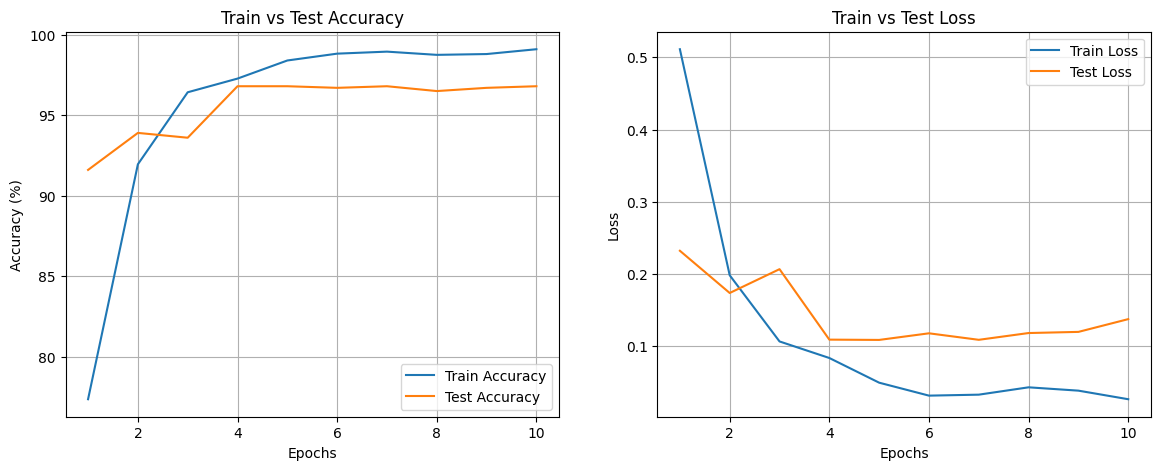

In [3]:
epochs_range = range(1, len(train_losses) + 1)

plt.figure(figsize=(14, 5))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(epochs_range, train_accs, label='Train Accuracy')
plt.plot(epochs_range, test_accs, label='Test Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy (%)')
plt.title('Train vs Test Accuracy')
plt.legend()
plt.grid(True)

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(epochs_range, train_losses, label='Train Loss')
plt.plot(epochs_range, test_losses, label='Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Train vs Test Loss')
plt.legend()
plt.grid(True)

plt.show()


Classification Report:
              precision    recall  f1-score   support

    No Tumor       0.96      0.97      0.96       400
       Tumor       0.98      0.97      0.97       600

    accuracy                           0.97      1000
   macro avg       0.97      0.97      0.97      1000
weighted avg       0.97      0.97      0.97      1000



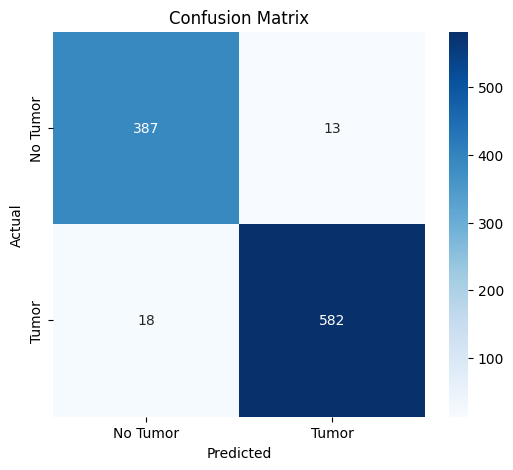

In [4]:
# Load best model
quantum_model.load_state_dict(torch.load("quantum_model.pth"))
quantum_model.eval()

all_preds = []
all_labels = []

with torch.no_grad():
    for X_batch, y_batch in test_loader:
        outputs = quantum_model(X_batch)
        preds = outputs.argmax(dim=1).cpu().numpy()
        labels = y_batch.argmax(dim=1).cpu().numpy()

        all_preds.extend(preds)
        all_labels.extend(labels)

# Classification Report
print("Classification Report:")
print(classification_report(all_labels, all_preds, target_names=[class_labels[0], class_labels[1]]))

# Confusion Matrix
cm = confusion_matrix(all_labels, all_preds)

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=[class_labels[0], class_labels[1]],
            yticklabels=[class_labels[0], class_labels[1]])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


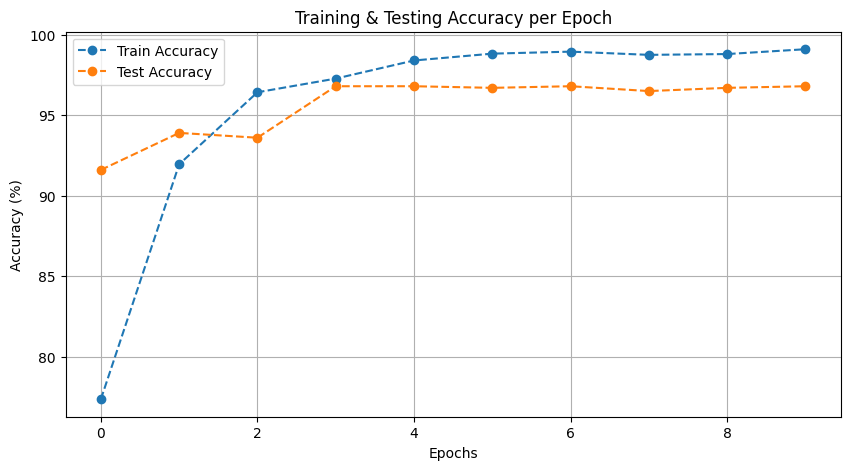

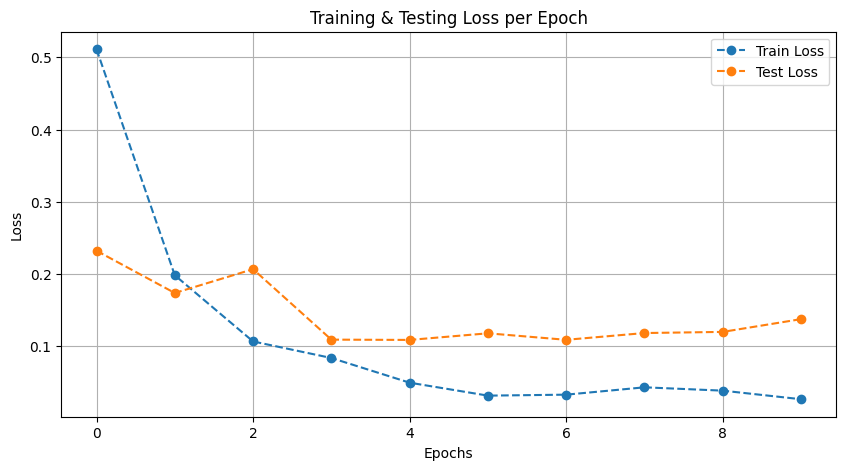


🔹 Classification Report:

              precision    recall  f1-score   support

    No Tumor       0.95      0.97      0.96       400
       Tumor       0.98      0.97      0.97       600

    accuracy                           0.97      1000
   macro avg       0.97      0.97      0.97      1000
weighted avg       0.97      0.97      0.97      1000



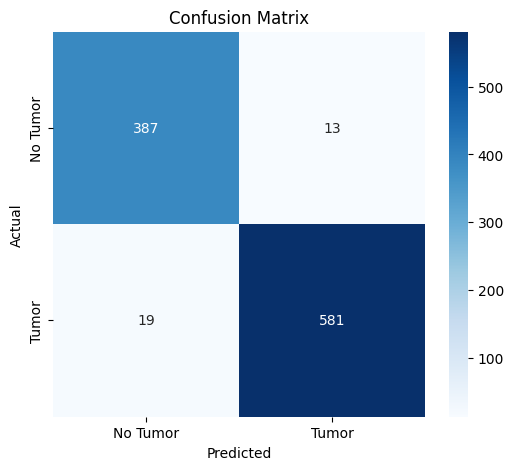

<Figure size 800x500 with 0 Axes>

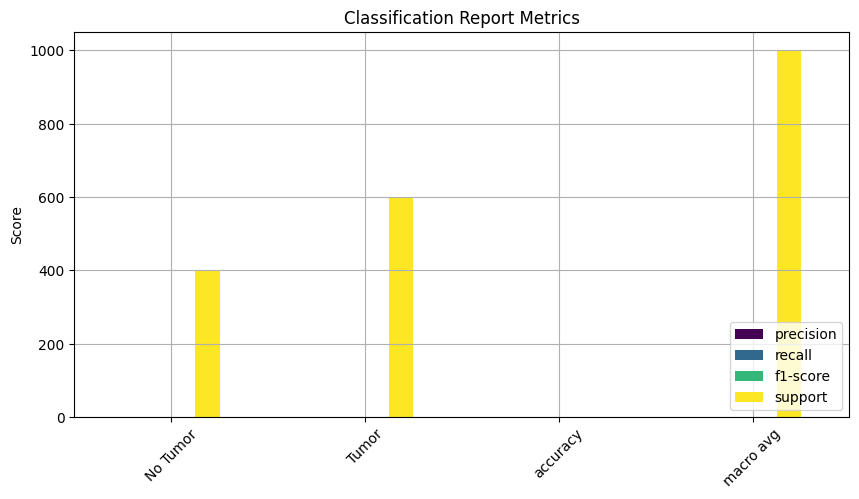

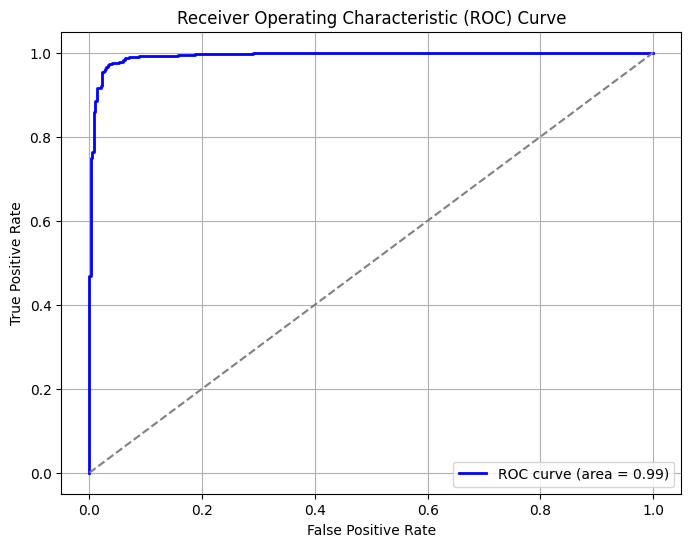

In [6]:
import seaborn as sns
import pandas as pd
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc

# ✅ 1️⃣ Plot Training & Testing Accuracy per Epoch
plt.figure(figsize=(10, 5))
plt.plot(train_accs, label="Train Accuracy", marker='o', linestyle='dashed')
plt.plot(test_accs, label="Test Accuracy", marker='o', linestyle='dashed')
plt.xlabel("Epochs")
plt.ylabel("Accuracy (%)")
plt.title("Training & Testing Accuracy per Epoch")
plt.legend()
plt.grid(True)
plt.show()

# ✅ 2️⃣ Plot Training & Testing Loss per Epoch
plt.figure(figsize=(10, 5))
plt.plot(train_losses, label="Train Loss", marker='o', linestyle='dashed')
plt.plot(test_losses, label="Test Loss", marker='o', linestyle='dashed')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training & Testing Loss per Epoch")
plt.legend()
plt.grid(True)
plt.show()

# ✅ 3️⃣ Evaluate Model on Test Data
y_true, y_pred, y_prob = [], [], []
quantum_model.eval()

with torch.no_grad():
    for X_batch, y_batch in test_loader:
        outputs = quantum_model(X_batch)
        preds = torch.argmax(outputs, dim=1).cpu().numpy()
        probs = torch.nn.functional.softmax(outputs, dim=1).cpu().numpy()[:, 1]  # Get probabilities for class "Tumor"
        labels = torch.argmax(y_batch, dim=1).cpu().numpy()
        
        y_pred.extend(preds)
        y_true.extend(labels)
        y_prob.extend(probs)

# ✅ 4️⃣ Generate Classification Report
report = classification_report(y_true, y_pred, target_names=["No Tumor", "Tumor"])
print("\n🔹 Classification Report:\n")
print(report)

# ✅ 5️⃣ Confusion Matrix
conf_matrix = confusion_matrix(y_true, y_pred)

# ✅ 6️⃣ Plot Confusion Matrix Heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["No Tumor", "Tumor"], yticklabels=["No Tumor", "Tumor"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# ✅ 7️⃣ Convert Classification Report to DataFrame for Bar Chart
report_dict = classification_report(y_true, y_pred, target_names=["No Tumor", "Tumor"], output_dict=True)
report_df = pd.DataFrame(report_dict).transpose()

# ✅ 8️⃣ Plot Classification Report Metrics as Bar Chart
plt.figure(figsize=(8, 5))
report_df.iloc[:-1, :].plot(kind='bar', figsize=(10, 5), colormap="viridis")
plt.title("Classification Report Metrics")
plt.ylabel("Score")
plt.xticks(rotation=45)
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

# ✅ 9️⃣ ROC Curve (Receiver Operating Characteristic Curve)
fpr, tpr, _ = roc_curve(y_true, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color="blue", lw=2, label=f"ROC curve (area = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color="grey", linestyle="--")  # Diagonal line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


In [8]:
import torch
import torchvision.transforms as transforms
import numpy as np
from PIL import Image

# ✅ Load the trained model
model_path = "quantum_model.pth"
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# ✅ Initialize the Quantum-CNN Model
qnn = create_qnn()
quantum_layer = TorchConnector(qnn)
quantum_model = QuantumCNN(quantum_layer).to(device)
quantum_model.load_state_dict(torch.load(model_path, map_location=device))
quantum_model.eval()

# ✅ Class labels
class_labels = {0: "No Tumor", 1: "Tumor"}

# ✅ Function to preprocess image
def preprocess_image(image_path, target_size=(128, 128)):
    try:
        image = Image.open(image_path).convert("RGB").resize(target_size)
        image = np.array(image) / 255.0  # Normalize
        image = torch.tensor(image, dtype=torch.float32).permute(2, 0, 1).unsqueeze(0).to(device)
        return image
    except Exception as e:
        print(f"Error loading image: {e}")
        return None

# ✅ Function to predict tumor presence
def predict_image(image_path):
    image_tensor = preprocess_image(image_path)
    if image_tensor is None:
        return

    with torch.no_grad():
        output = quantum_model(image_tensor)
        predicted_class = torch.argmax(output, dim=1).item()

    print(f"\n🔹 Prediction: {class_labels[predicted_class]}")

# ✅ Take user input for image path and predict
image_path = input("Enter the path of the brain MRI image: ")
predict_image(image_path)


Enter the path of the brain MRI image:  /kaggle/input/brain-tumor-multimodal-image-ct-and-mri/Dataset/Brain Tumor MRI images/Healthy/mri_healthy (1).jpeg



🔹 Prediction: No Tumor


In [ ]:
/kaggle/input/brain-tumor-multimodal-image-ct-and-mri/Dataset/Brain Tumor MRI images/Healthy/mri_healthy (1).jpeg